In [1]:
!pip install datasets

In [2]:
# Importing libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

In [3]:
# Loading Data
from datasets import load_dataset
ds = load_dataset("lukebarousse/data_jobs")
df = ds['train'].to_pandas()

In [4]:
# Data Cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x : ast.literal_eval(x) if pd.notna(x) else x)

# Filter for India Data Analyst roles

In [5]:
df_DA_India = df[(df['job_country'] == 'India') & (df['job_title_short'] == 'Data Analyst')]


# Locations for Job Opportunity

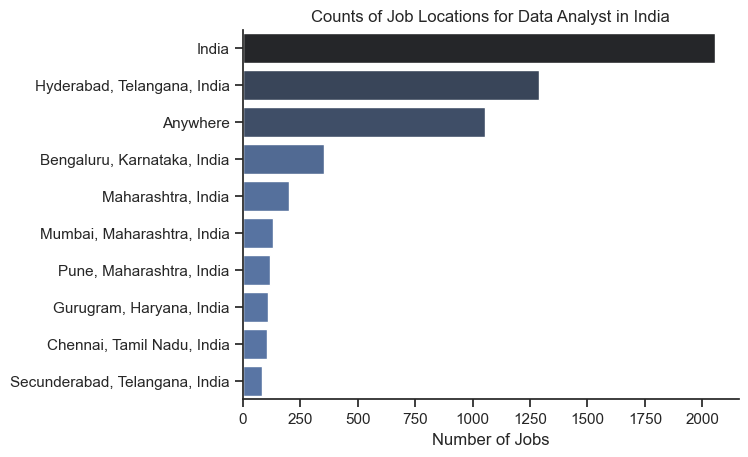

In [6]:
df_plot= df_DA_India['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot , x='count', y ='job_location',hue='count', palette='dark:b_r',legend=False)
sns.despine()
plt.title('Counts of Job Locations for Data Analyst in India')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

# Different Requirements\Offerings for a Job

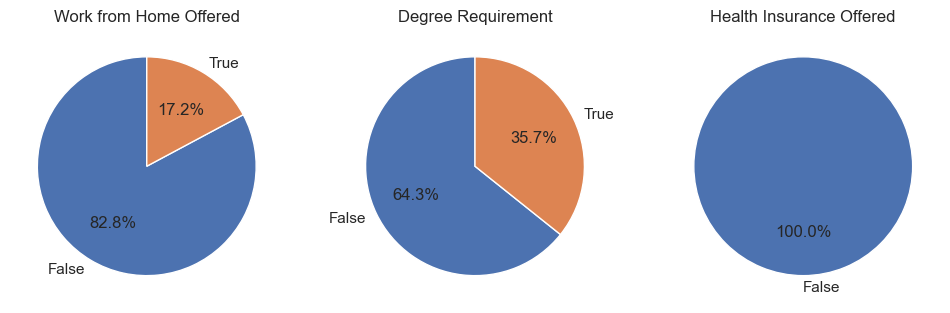

In [7]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}
fig , ax = plt.subplots(1,3)
fig.set_size_inches((12,5))

for i, (column, title) in enumerate(dict_column.items()):
    counts = df_DA_India[column].value_counts()
    
    ax[i].pie(counts ,labels=counts.index.astype(str),autopct = '%1.1f%%' , startangle=90)
    ax[i].set_title(title)

#plt.suptitle('Benefit Analysis of Data Jobs', fontsize=16)
plt.show()

# Companies available for Job

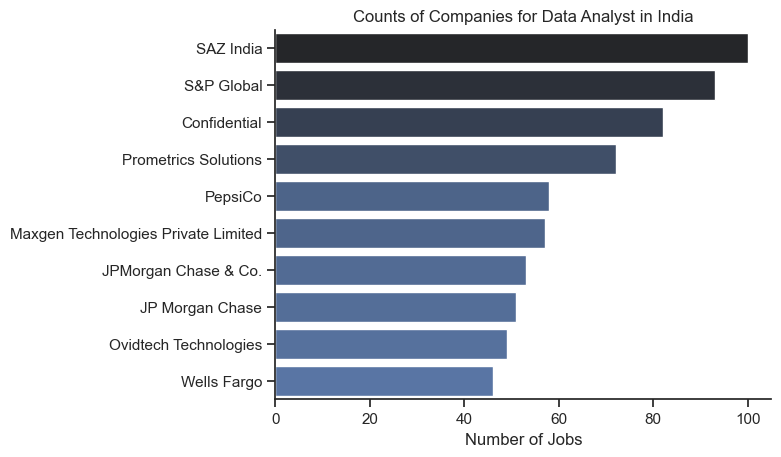

In [8]:
df_plot= df_DA_India['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot , x='count', y ='company_name',hue='count', palette='dark:b_r',legend=False)
sns.despine()
plt.title('Counts of Companies for Data Analyst in India')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

# Whate are the most demanded skills for top 3 most popular data roles?

In [9]:
df_India = df[df['job_country']== 'India']

In [10]:
df_skills = df_India.explode('job_skills')
df_skills[['job_title','job_skills']]

,job_title,job_skills
16,Big Data Engineer,powershell
16,Big Data Engineer,python
16,Big Data Engineer,sql
16,Big Data Engineer,mysql
16,Big Data Engineer,sql server
...,...,...
785716,Application Support Analyst,c#
785716,Application Support Analyst,sql
785718,Senior Performance QA Analyst,None
785740,AWS System Analyst,aws


In [11]:
df_skills_count = df_skills.groupby(['job_skills' , 'job_title_short']).size()
df_skills_count  = df_skills_count.reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count' , ascending=False , inplace = True)
df_skills_count

,job_skills,job_title_short,skill_count
1374,sql,Data Engineer,12993
1088,python,Data Engineer,11568
1089,python,Data Scientist,9248
1327,spark,Data Engineer,7157
103,aws,Data Engineer,6993
...,...,...,...
34,angular.js,Data Scientist,1
49,arch,Business Analyst,1
787,mlpack,Data Engineer,1
1679,yarn,Senior Data Scientist,1


In [12]:
job_titles = df_skills_count['job_title_short'].unique().tolist()
job_titles = sorted(job_titles[:3])
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

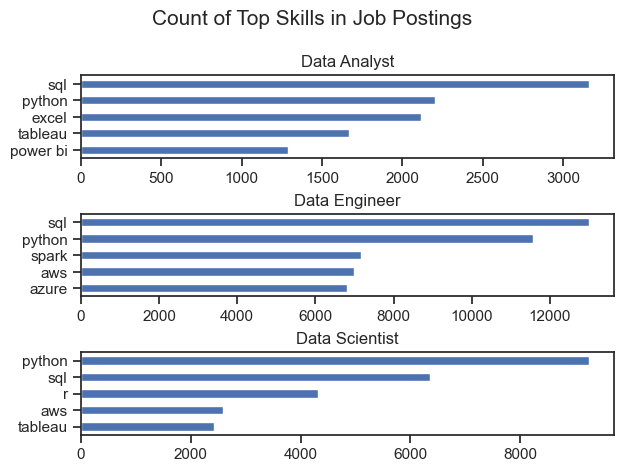

In [13]:
fig,ax=plt.subplots(len(job_titles),1)

for i , job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh' , x='job_skills' , y = 'skill_count' , ax=ax[i] , title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)

fig.suptitle('Count of Top Skills in Job Postings', fontsize=15)
fig.tight_layout(h_pad=0.5)
plt.show()


In [14]:
df_job_title_count = df_India['job_title_short'].value_counts().reset_index(name='jobs_total')

In [15]:
df_skills_perc=pd.merge(df_skills_count , df_job_title_count, how='left' , on='job_title_short')
df_skills_perc['skill_percent']= 100 * df_skills_perc['skill_count']/df_skills_perc['jobs_total']
df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,sql,Data Engineer,12993,19062,68.161788
1,python,Data Engineer,11568,19062,60.686182
2,python,Data Scientist,9248,13279,69.643798
3,spark,Data Engineer,7157,19062,37.545903
4,aws,Data Engineer,6993,19062,36.685552
...,...,...,...,...,...
1684,angular.js,Data Scientist,1,13279,0.007531
1685,arch,Business Analyst,1,1887,0.052994
1686,mlpack,Data Engineer,1,19062,0.005246
1687,yarn,Senior Data Scientist,1,2486,0.040225


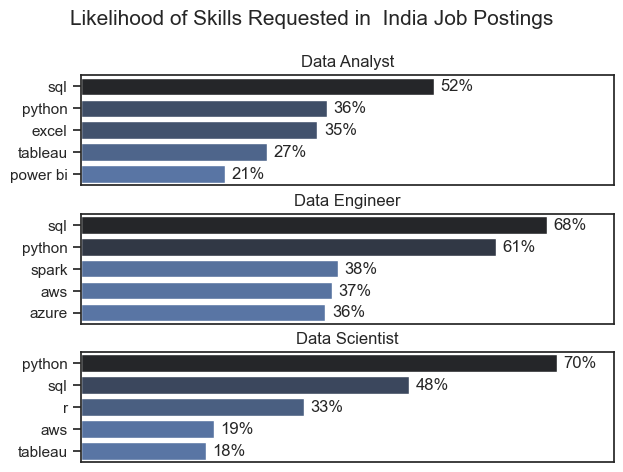

In [16]:
fig,ax=plt.subplots(len(job_titles),1)

for i , job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh' , x='job_skills' , y = 'skill_percent' , ax=ax[i] , title=job_title)
    sns.barplot(data=df_plot , x = 'skill_percent', y = 'job_skills' , ax=ax[i] , hue = 'skill_count' , palette = 'dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0,78)

    for n , v in enumerate(df_plot['skill_percent']):
        ax[i].text(v+1,n,f'{v:.0f}%', va='center')
    if i != len(job_title)-1:   
        ax[i].set_xticks([])
fig.suptitle('Likelihood of Skills Requested in  India Job Postings', fontsize=15)
fig.tight_layout(h_pad=0.5)
plt.show()


# How are in-demand skills trending for Data Analysis?

In [17]:
df_DA_India = df[(df['job_title'] == 'Data Analyst') & (df['job_country'] == 'India')].copy()

In [18]:
df_DA_India['job_posted_month_no'] = df_DA_India['job_posted_date'].dt.month

In [19]:
df_DA_India_explode = df_DA_India.explode('job_skills')

In [20]:
df_DA_India_pivot=df_DA_India_explode.pivot_table(index='job_posted_month_no' , columns='job_skills' , aggfunc='size', fill_value=0)
df_DA_India_pivot.loc['Total']= df_DA_India_pivot.sum()
df_DA_India_pivot=df_DA_India_pivot[df_DA_India_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_India_pivot = df_DA_India_pivot.drop('Total')
df_DA_India_pivot

job_skills,sql,python,excel,tableau,power bi,sas,r,aws,azure,javascript,...,react.js,sqlite,suse,swift,tidyr,unify,vb.net,watson,webex,wire
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,75,55,51,41,26,36,23,6,5,11,...,0,0,0,0,0,0,0,0,1,0
2,64,40,46,32,24,14,23,6,7,8,...,0,0,0,0,0,0,0,1,0,0
3,57,25,32,30,19,10,9,7,6,3,...,0,0,1,1,0,0,0,0,0,0
4,56,35,35,27,23,24,16,4,8,7,...,1,0,0,0,0,0,0,0,0,0
5,44,25,37,24,18,10,9,4,9,3,...,0,0,0,0,0,0,0,0,0,0
6,50,42,34,29,23,28,23,10,9,5,...,0,0,0,0,0,0,0,0,0,0
7,57,37,37,38,20,20,23,5,8,5,...,0,0,0,0,1,0,0,0,0,0
8,88,58,54,47,43,24,28,20,11,7,...,0,0,0,0,0,0,0,0,0,0
9,96,65,59,53,43,26,27,12,5,14,...,0,0,0,0,0,1,0,0,0,0


In [21]:
DA_totals = df_DA_India.groupby('job_posted_month_no').size()

In [22]:
df_DA_India_percent = df_DA_India_pivot.div(DA_totals/100 , axis=0)

In [23]:
# change momth no into month name 
df_DA_India_percent = df_DA_India_percent.reset_index()
df_DA_India_percent['job_posted_month'] = df_DA_India_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x , format = '%m').strftime('%b'))
df_DA_India_percent.set_index('job_posted_month')
df_DA_India_percent.drop(columns='job_posted_month_no')

job_skills,sql,python,excel,tableau,power bi,sas,r,aws,azure,javascript,...,sqlite,suse,swift,tidyr,unify,vb.net,watson,webex,wire,job_posted_month
0,52.083333,38.194444,35.416667,28.472222,18.055556,25.000000,15.972222,4.166667,3.472222,7.638889,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.694444,0.000000,Jan
1,54.237288,33.898305,38.983051,27.118644,20.338983,11.864407,19.491525,5.084746,5.932203,6.779661,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.847458,0.000000,0.000000,Feb
2,58.762887,25.773196,32.989691,30.927835,19.587629,10.309278,9.278351,7.216495,6.185567,3.092784,...,0.000000,1.030928,1.030928,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,Mar
3,56.565657,35.353535,35.353535,27.272727,23.232323,24.242424,16.161616,4.040404,8.080808,7.070707,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,Apr
4,68.750000,39.062500,57.812500,37.500000,28.125000,15.625000,14.062500,6.250000,14.062500,4.687500,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,May
5,53.763441,45.161290,36.559140,31.182796,24.731183,30.107527,24.731183,10.752688,9.677419,5.376344,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,Jun
6,61.956522,40.217391,40.217391,41.304348,21.739130,21.739130,25.000000,5.434783,8.695652,5.434783,...,0.000000,0.000000,0.000000,1.086957,0.00000,0.000000,0.000000,0.000000,0.000000,Jul
7,62.411348,41.134752,38.297872,33.333333,30.496454,17.021277,19.858156,14.184397,7.801418,4.964539,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,Aug
8,57.831325,39.156627,35.542169,31.927711,25.903614,15.662651,16.265060,7.228916,3.012048,8.433735,...,0.000000,0.000000,0.000000,0.000000,0.60241,0.000000,0.000000,0.000000,0.000000,Sep
9,59.523810,42.857143,42.857143,37.301587,22.222222,19.047619,19.047619,11.904762,7.142857,3.174603,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,Oct


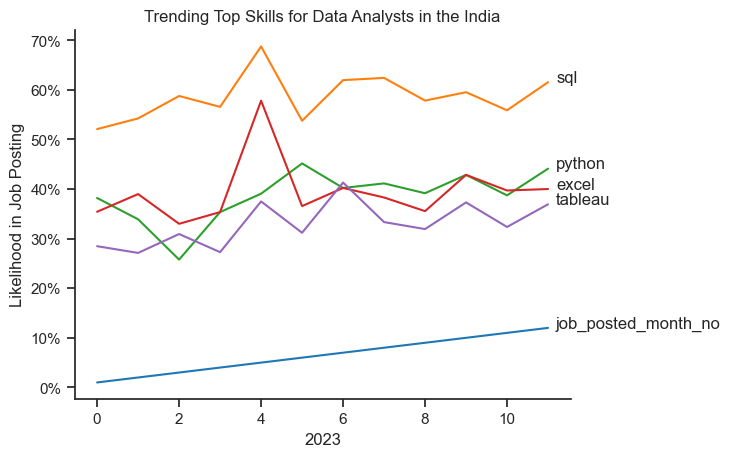

In [24]:
df_plot = df_DA_India_percent.iloc[:, :5]

sns.lineplot(data= df_plot, dashes=False , palette = 'tab10')
sns.set_theme(style='ticks')
sns.despine()

plt.title('Trending Top Skills for Data Analysts in the India')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')
plt.legend().remove()

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))
for i in range(5):
     plt.text(11.2,df_plot.iloc[-1,i],df_plot.columns[i]) 

# Salary Analysis

# How well do jobs and skills pay for Data Analysts?

In [25]:
df_India = df[(df['job_country'] == 'India')].dropna(subset=['salary_year_avg'])

In [26]:
job_titles = df_India['job_title_short'].value_counts().index[:6].tolist()
job_titles

['Data Engineer',
 'Data Analyst',
 'Data Scientist',
 'Machine Learning Engineer',
 'Senior Data Engineer',
 'Software Engineer']

In [27]:
df_India_top6 = df_India[df_India['job_title_short'].isin(job_titles)]

In [28]:
df_India_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

Index(['Data Engineer', 'Senior Data Engineer', 'Data Scientist',
       'Data Analyst', 'Machine Learning Engineer', 'Software Engineer'],
      dtype='object', name='job_title_short')

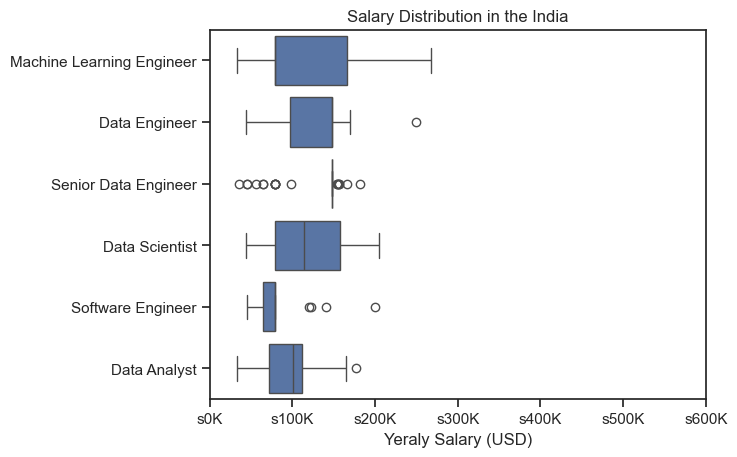

In [29]:
sns.boxplot(data=df_India_top6 , x = 'salary_year_avg' , y='job_title_short')
sns.set_theme(style='ticks')

plt.title('Salary Distribution in the India')
plt.xlabel('Yeraly Salary (USD)')
plt.ylabel('')
plt.xlim(0,600000)
ticks_x = plt.FuncFormatter(lambda y , pos:f's{int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

# Investigate Median Salary Vs Skill For Data Analysts

In [36]:
df_DA_India = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'India')].copy()
df_DA_India = df_DA_India.dropna(subset=['salary_year_avg'])

In [38]:
df_DA_India = df_DA_India.explode('job_skills')
df_DA_India[['salary_year_avg' , 'job_skills']].head(5)

,salary_year_avg,job_skills
11412,50400.0,python
11412,50400.0,sql
11412,50400.0,aws
11412,50400.0,azure
11412,50400.0,excel


In [50]:
df_DA_top_pay = df_DA_India.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='median',ascending=False)
df_DA_top_pay=df_DA_India_pay.head(10)

In [54]:
df_DA_skills = df_DA_India.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count',ascending=False)
df_DA_skills=df_DA_skills.head(10).sort_values(by='median',ascending=False)
df_DA_skills

,count,median
job_skills,,
spark,11,111175.0
power bi,17,111175.0
tableau,20,108087.5
excel,39,98500.0
sql,46,96050.0
python,36,96050.0
azure,15,93600.0
r,18,79200.0
aws,12,79200.0


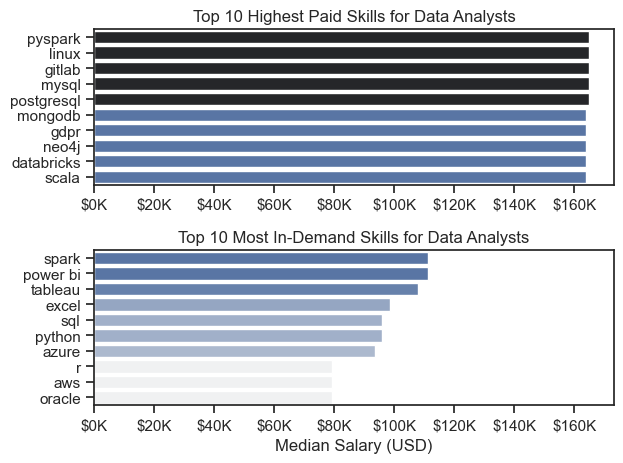

In [55]:
fig, ax = plt.subplots(2, 1)  

sns.set_theme(style='ticks')

# Top 10 Highest Paid Skills for Data Analysts
sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, hue='median', ax=ax[0], palette='dark:b_r')
ax[0].legend().remove()
# original code:
# df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False) 
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


# Top 10 Most In-Demand Skills for Data Analystsr')
sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, hue='median', ax=ax[1], palette='light:b')
ax[1].legend().remove()
# original code:
# df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())  # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.tight_layout()
plt.show()

# what is the most optimal skill to learn for Data Analysts?

In [56]:
df_DA_India = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'India')].copy()

In [57]:
df_DA_India = df_DA_India.dropna(subset=['salary_year_avg'])
df_DA_India_explode = df_DA_India.explode('job_skills')
df_DA_India_explode[['salary_year_avg' , 'job_skills']].head(5)

,salary_year_avg,job_skills
11412,50400.0,python
11412,50400.0,sql
11412,50400.0,aws
11412,50400.0,azure
11412,50400.0,excel


In [63]:
df_DA_skills = df_DA_India_explode.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count',ascending=False)
df_DA_skills = df_DA_skills.rename(columns={'count': 'skill_count' , 'median': 'median_salary'})
DA_job_count = len(df_DA_India)
df_DA_skills['skill_percent'] = df_DA_skills['skill_count']/ DA_job_count * 100
skill_percent = 5
df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skill_percent'] > skill_percent]
df_DA_skills_high_demand

,skill_count,median_salary,skill_percent
job_skills,,,
sql,46,96050.00,48.936170
excel,39,98500.00,41.489362
python,36,96050.00,38.297872
tableau,20,108087.50,21.276596
r,18,79200.00,19.148936
power bi,17,111175.00,18.085106
azure,15,93600.00,15.957447
aws,12,79200.00,12.765957
oracle,11,79200.00,11.702128


In [68]:
!pip install adjustText

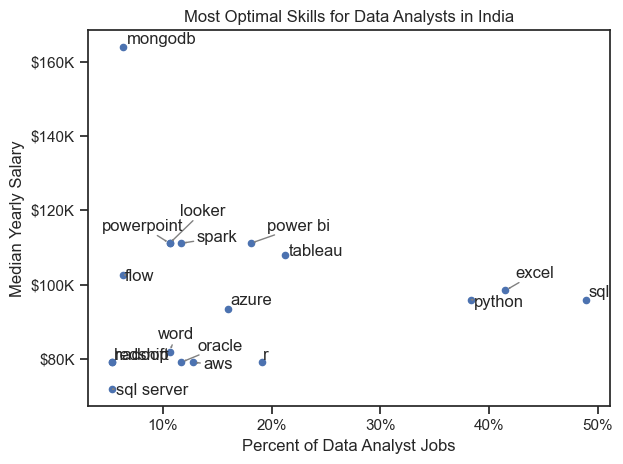

In [70]:
from adjustText import adjust_text

df_DA_skills_high_demand.plot(kind='scatter', x='skill_percent', y='median_salary')

# Prepare texts for adjustText
texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], txt))

# Adjust text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

# Set axis labels, title, and legend
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skills for Data Analysts in India')

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter((lambda y, pos: f'${int(y/1000)}K')))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))
# Adjust layout and display plot 
plt.tight_layout()
plt.show()

In [73]:
df['job_type_skills'].head(10)

0                                                 None
1    {'analyst_tools': ['power bi', 'tableau'], 'pr...
2    {'analyst_tools': ['dax'], 'cloud': ['azure'],...
3    {'cloud': ['aws'], 'libraries': ['tensorflow',...
4    {'cloud': ['oracle', 'aws'], 'other': ['ansibl...
5    {'cloud': ['gcp'], 'programming': ['python', '...
6    {'cloud': ['gcp', 'bigquery'], 'databases': ['...
7    {'cloud': ['gcp', 'azure', 'aws', 'bigquery', ...
8    {'analyst_tools': ['excel', 'powerpoint', 'pow...
9    {'analyst_tools': ['excel'], 'cloud': ['azure'...
Name: job_type_skills, dtype: object

In [75]:
df_technology = df['job_type_skills'].copy()
#remove duplicates
df_technology = df_technology.drop_duplicates()
#remove NaN values
df_technology = df_technology.dropna()
#combine all dict into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)# convert string to dictionary
    for key , value in row_dict.items():
        if key in technology_dict:# if key already exist in technology_dict , add value to existing dictionary
            technology_dict[key] += value
        else:                      # if key  does not  exist in technology_dict , add key and value 
            technology_dict[key] = value
# remove duplicates by converting val to set then back to list
for key , value in technology_dict.items():
    technology_dict[key] ==list(set(value))
technology_dict

{'analyst_tools': ['power bi',
  'tableau',
  'dax',
  'excel',
  'powerpoint',
  'power bi',
  'excel',
  'qlik',
  'excel',
  'power bi',
  'sap',
  'power bi',
  'excel',
  'excel',
  'looker',
  'tableau',
  'tableau',
  'excel',
  'sap',
  'power bi',
  'excel',
  'word',
  'powerpoint',
  'sas',
  'spss',
  'tableau',
  'excel',
  'power bi',
  'power bi',
  'microstrategy',
  'cognos',
  'sap',
  'excel',
  'tableau',
  'looker',
  'tableau',
  'qlik',
  'power bi',
  'tableau',
  'tableau',
  'power bi',
  'looker',
  'tableau',
  'excel',
  'power bi',
  'word',
  'excel',
  'powerpoint',
  'outlook',
  'tableau',
  'power bi',
  'excel',
  'tableau',
  'power bi',
  'tableau',
  'excel',
  'looker',
  'sap',
  'sas',
  'word',
  'excel',
  'splunk',
  'tableau',
  'qlik',
  'tableau',
  'power bi',
  'tableau',
  'excel',
  'tableau',
  'power bi',
  'excel',
  'word',
  'powerpoint',
  'power bi',
  'tableau',
  'tableau',
  'sap',
  'power bi',
  'qlik',
  'tableau',
  'exc

In [80]:
df_technology= pd.DataFrame(list(technology_dict.items()), columns= ['technology' , 'skills'])
df_technology = df_technology.explode('skills')
df_technology

,technology,skills
0,analyst_tools,power bi
0,analyst_tools,tableau
0,analyst_tools,dax
0,analyst_tools,excel
0,analyst_tools,powerpoint
...,...,...
9,sync,twilio
9,sync,slack
9,sync,zoom
9,sync,unify


In [82]:
df_plot = df_DA_skills_high_demand.merge(df_technology,left_on = 'job_skills' ,right_on = 'skills' )

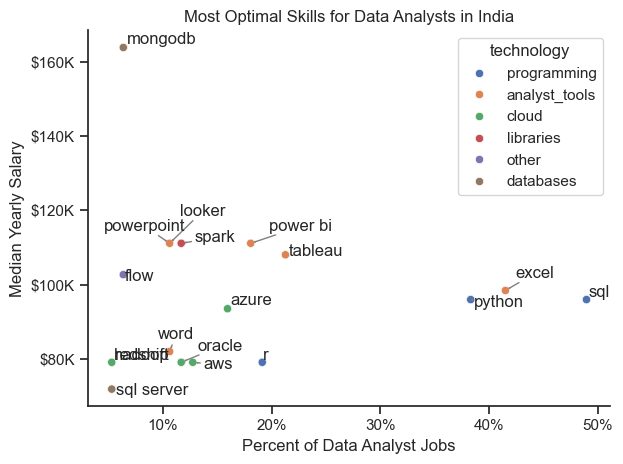

In [83]:
from adjustText import adjust_text

#df_plot.plot(kind='scatter', x='skill_percent', y='median_salary')
sns.scatterplot(
    data = df_plot,
    x= 'skill_percent',
    y= 'median_salary',
    hue='technology'
)

sns.despine()
sns.set_theme(style='ticks')
# Prepare texts for adjustText
texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], txt))

# Adjust text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

# Set axis labels, title, and legend
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skills for Data Analysts in India')

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter((lambda y, pos: f'${int(y/1000)}K')))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))
# Adjust layout and display plot 
plt.tight_layout()
plt.show()